In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics 
%matplotlib inline

In [3]:
data = pd.read_csv("housing.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.shape

(21613, 21)

In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
data.grade.value_counts()

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

In [8]:
data.condition.value_counts()

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

In [9]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

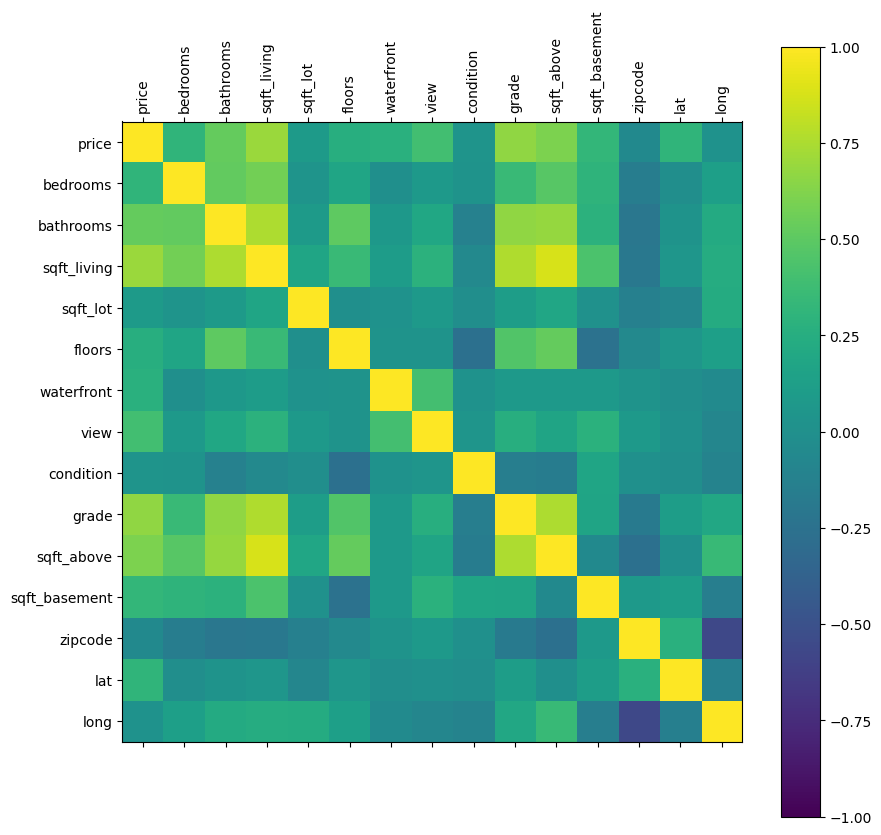

In [10]:
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','zipcode','lat','long']
df = data[features]
correlations = df.corr()
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, len(features), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(features, rotation = 90)
ax.set_yticklabels(features)
plt.show()

In [11]:
data['waterfront'] = pd.Categorical(data['waterfront'], ordered=True)
data['view'] = pd.Categorical(data['view'], ordered=True)
data['condition'] = pd.Categorical(data['condition'], ordered=True)
data['grade'] = pd.Categorical(data['grade'], ordered=False)
data['zipcode'] = pd.Categorical(data['zipcode'], ordered=False)

In [12]:
data.dtypes

id                  int64
date               object
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view             category
condition        category
grade            category
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
zipcode          category
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
dtype: object

<Axes: xlabel='sqft_living', ylabel='price'>

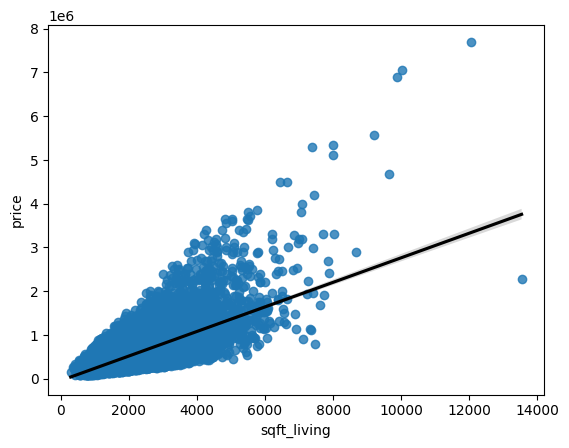

In [13]:
sns.regplot(x = 'sqft_living', y = 'price', data = data, line_kws={"color": "black"})

<Axes: xlabel='sqft_above', ylabel='price'>

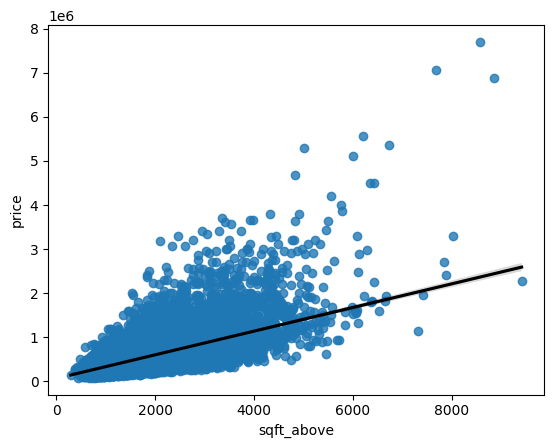

In [14]:
sns.regplot(x = 'sqft_above', y = 'price', data = data, line_kws={"color": "black"})


<Axes: xlabel='sqft_basement', ylabel='price'>

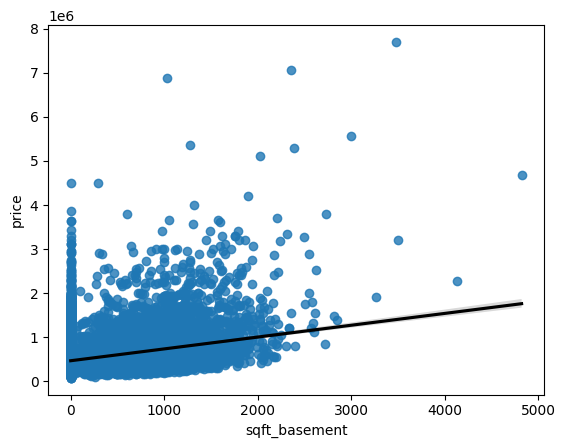

In [15]:
sns.regplot(x = 'sqft_basement', y = 'price', data = data, line_kws={"color": "black"})

C:\Users\HP\AppData\Local\Temp\ipykernel_14096\2217227353.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x = 'condition', y = 'price', data = data, palette = 'deep')


<Axes: xlabel='condition', ylabel='price'>

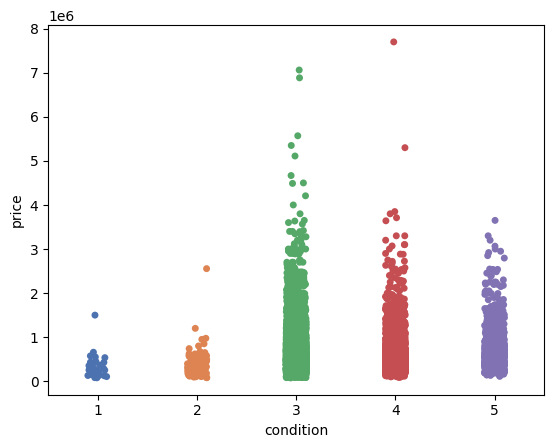

In [16]:
sns.stripplot(x = 'condition', y = 'price', data = data, palette = 'deep')

C:\Users\HP\AppData\Local\Temp\ipykernel_14096\885479806.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x = 'grade', y = 'price', data = data, palette = 'deep')


<Axes: xlabel='grade', ylabel='price'>

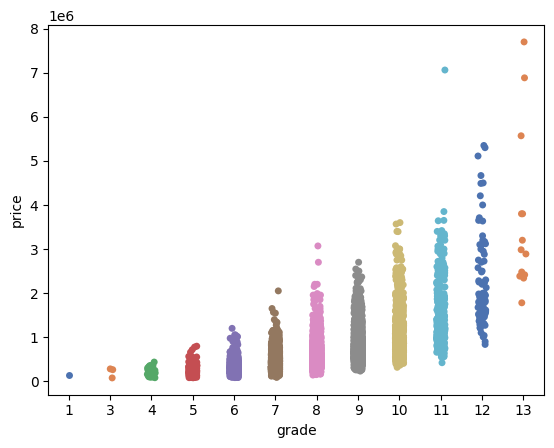

In [17]:
sns.stripplot(x = 'grade', y = 'price', data = data, palette = 'deep')

C:\Users\HP\AppData\Local\Temp\ipykernel_14096\2578007818.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x = 'bedrooms', y = 'price', data = data, palette = 'pastel')


<Axes: xlabel='bedrooms', ylabel='price'>

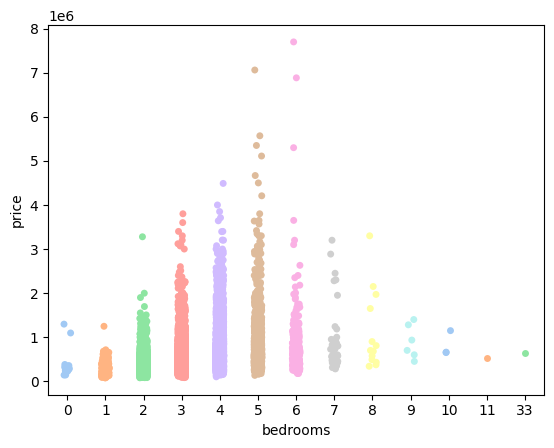

In [18]:
sns.stripplot(x = 'bedrooms', y = 'price', data = data, palette = 'pastel')

C:\Users\HP\AppData\Local\Temp\ipykernel_14096\1386795959.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x = 'bathrooms', y = 'price', data = data, palette = 'pastel')


<Axes: xlabel='bathrooms', ylabel='price'>

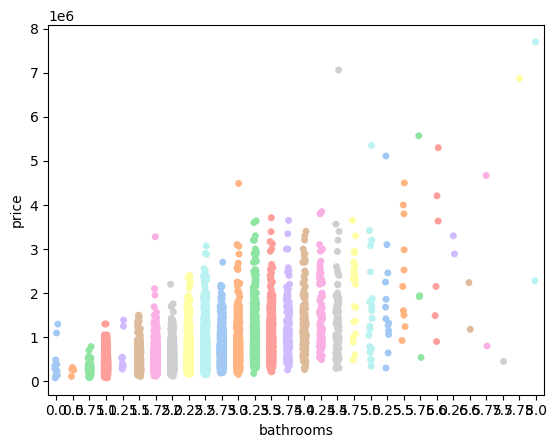

In [19]:
sns.stripplot(x = 'bathrooms', y = 'price', data = data, palette = 'pastel')

In [20]:
data = data[data['bedrooms'] < 10]

In [21]:
data = data[data['bathrooms'] < 8]

In [22]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [23]:
cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'grade', 'condition']
df = data[cols]

In [24]:
df=pd.get_dummies(data,columns=['waterfront','view','condition','grade','zipcode'], drop_first=True)

In [25]:
y=data['price']
df= df.drop(['date','id','price'],axis=1)

In [33]:
x_train,x_test,y_train,y_test=train_test_split(df,y,train_size=0.8,random_state=0)

In [27]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print("Coefficients: \n", regr.coef_)

Coefficients: 
 [-1.18025859e+04  2.70593630e+04  9.08424930e+01  2.93172867e-01
 -3.05692434e+04  7.30249505e+01  1.78298306e+01 -3.12235365e+02
  2.23257682e+01  2.09995401e+05 -1.81883456e+05  1.58192089e+01
 -1.60485981e-01  5.48449910e+05  9.31119434e+04  7.70645161e+04
  1.41845767e+05  3.16325283e+05  8.49873165e+04  8.86505984e+04
  1.14725919e+05  1.55270791e+05  2.93558569e+04 -4.75961574e+04
 -8.94459067e+04 -9.16071923e+04 -8.70326693e+04 -6.54273301e+04
  1.01981388e+04  1.26788640e+05  3.29639353e+05  7.22652598e+05
  1.37781046e+06  1.97257061e+04 -1.13142158e+04  7.21991910e+05
  2.68320779e+05  2.22864488e+05  2.17452669e+05  2.30361113e+05
  1.04526124e+05  5.43013340e+04  8.90998085e+04  6.86311744e+04
  6.35836887e+04 -4.22072089e+04  1.73142557e+05  1.66442232e+05
  4.64115200e+04  2.20872038e+05  1.40052419e+04  1.46347047e+04
 -1.10977067e+04  2.98379235e+05  1.28687539e+05  7.00585243e+04
  1.11473591e+06  4.65325216e+05  2.40451887e+04  1.58071661e+05
  1.95056

In [34]:
predictions = regr.predict(x_test)
print("Mean Squared Error: %.5f" % metrics.mean_squared_error(y_test, predictions))
print("Score : %.5f" % regr.score(x_test, y_test))

Mean Squared Error: 21314373902.93441
Score : 0.83457


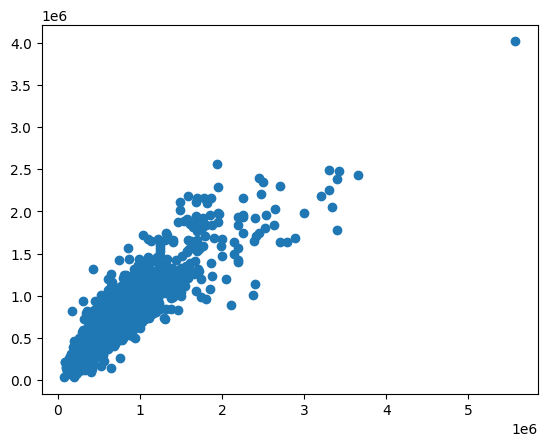

In [35]:
plt.scatter(y_test, predictions)

C:\Users\HP\AppData\Local\Temp\ipykernel_14096\1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


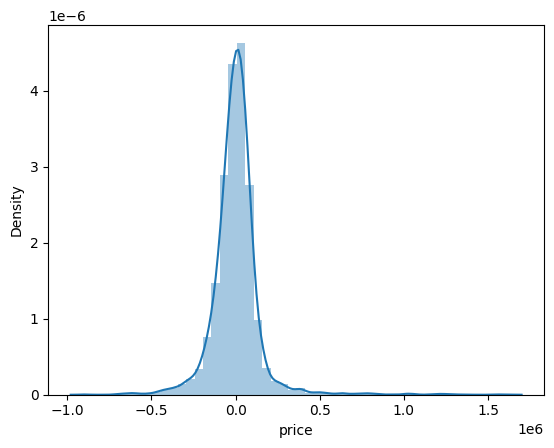

In [36]:
sns.distplot((y_test-predictions),bins=50);

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 87574.47582724945
MSE: 21314373902.934406
RMSE: 145994.431068224


In [32]:
print("R2 score: %.2f"%metrics.r2_score(y_test, predictions))

R2 score: 0.83
